# k-means from scratch!
Writing your own k-means algorithm will reinforce your understanding of how it works, improve your Python skills, and it's not as hard as you think.
## Refresher on how the k-means works
The goal of the k-means algorithm is to put each data point into one of k clusters, minimizing the within-cluster-sum-of-squares, where sum-of-squares is referring to the sum of the squared errors between a data point and the centroid of the cluster.
## Initialize the clusters

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.spatial import distance
%matplotlib inline

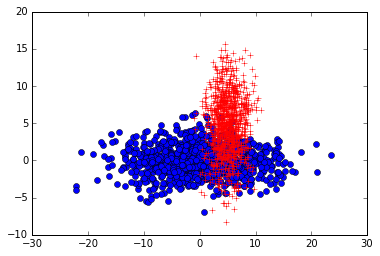

In [2]:
# Create points
sizeOfClusters = 1000

cluster1 = pd.DataFrame(columns=["x","y","cluster"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (0,0), with sd = 1
    x = random.gauss(0,7) # gauss(mean, sd) (guassian distribution <=> normal distribution)
    y = random.gauss(0,2)
    cluster1.loc[i] = [x,y,1]
    
cluster2 = pd.DataFrame(columns=["x","y","cluster"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (5,5), with sd = 1
    x = random.gauss(5,2)
    y = random.gauss(5,4)
    cluster2.loc[i] = [x,y,2]

plt.plot(cluster1.x,cluster1.y,'bo')
plt.plot(cluster2.x,cluster2.y,'r+')
plt.show()

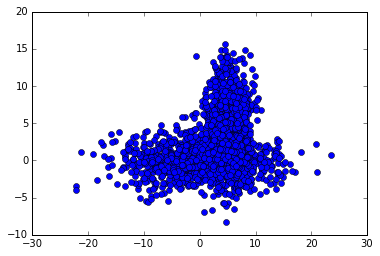

In [3]:
# Now we combine the datasets, and you have to disentangle them with k-means
clusterF = pd.concat([cluster1,cluster2]).reset_index(drop=True)
clusterF.apply(np.random.shuffle,axis=1)
clusterFPrevious = clusterF.copy(deep=True)
clusterF.cluster = np.nan
plt.plot(clusterF.x,clusterF.y,'bo')

In [4]:
clusterF.head()

,x,y,cluster
0,-11.057524,-3.806431,NaN
1,-9.267913,-2.519358,NaN
2,13.383075,1.361307,NaN
3,-8.334247,-1.540288,NaN
4,15.333977,-1.485772,NaN


In [5]:
clusterFPrevious.head()

,x,y,cluster
0,-11.057524,-3.806431,1.0
1,-9.267913,-2.519358,1.0
2,13.383075,1.361307,1.0
3,-8.334247,-1.540288,1.0
4,15.333977,-1.485772,1.0


## Let's write some pseudo-code
#### For an extra challenge to yourself, don't read the pseudo-code; just go off of your understanding of k-means.
1. Take `k` as given.
2. Choose `k` points randomly from your dataset; set your initial centroids to these points.
3. Calculate the distances from each data point in the whole set to each centroid.
4. Put each data point in the cluster whose centroid it is closest to.
5. Update the centroids by taking the mean of the positions of all the current member points.
6. Repeat steps 3 through 5 until stability is reached (i.e., no data point has changed membership to another cluster).

## Now, let's write some real code!
Just assume k=2.  You don't have to write the code to be able to generalize to any k.  (Though "more power to you" if you do.)

In [6]:
def kmeans(X, k = 2):
    choice = np.random.choice(len(X), k, replace=False)
    centroids = X[choice]
    
    print "Centroids ({}): {}".format(0, str(centroids)[:80])
    
    for i in range(len(X)*2):
        clusters = [list() for _ in range(k)]
        y = []
        for x in X:
            centroid_distances = [(distance.euclidean(x, centroid), cluster_no) for cluster_no, centroid in enumerate(centroids)]
            _, cluster_no = sorted(centroid_distances)[0]
            y.append(cluster_no)

            clusters[cluster_no].append(x)


        previous_centroids = list(centroids)    
        centroids = [np.mean(clusters[cluster_no], axis=0) for cluster_no in range(k)]
        print "Centroids ({}): {}".format(i+1, str(centroids)[:80])

        if np.all(np.abs(np.array(previous_centroids) - np.array(centroids)) < 0.00001):
            return y, centroids

    print "Never converged"
    return y, centroids
        

In [27]:
clusterF.cluster, centroids = kmeans(clusterF[['x','y']].values, k=10)

Centroids (0): [[  8.08858721   3.32225922]
 [  3.89657276   6.29196685]
 [ -8.21746863  -0.050
Centroids (1): [array([ 8.76408915,  2.90080509]), array([ 4.24110805,  6.27810931]), array([-9
Centroids (2): [array([ 9.16157524,  2.67759863]), array([ 4.47023475,  5.99480198]), array([-1
Centroids (3): [array([ 9.67327515,  2.24106801]), array([ 4.68748644,  5.93950553]), array([-1
Centroids (4): [array([ 10.31413359,   1.6899946 ]), array([ 4.83213801,  5.96134084]), array([
Centroids (5): [array([ 10.94379237,   1.04160826]), array([ 4.96885224,  5.99552051]), array([
Centroids (6): [array([ 11.48188653,   0.5009116 ]), array([ 5.09730155,  6.00526386]), array([
Centroids (7): [array([ 11.83039056,   0.21626413]), array([ 5.17163372,  6.032471  ]), array([
Centroids (8): [array([ 12.01889962,   0.01455148]), array([ 5.20953195,  6.04200837]), array([
Centroids (9): [array([ 12.31872808,  -0.15556949]), array([ 5.21975101,  6.07202132]), array([
Centroids (10): [array([ 12.61889285,  -

In [28]:
clusterF.head()

,x,y,cluster
0,-11.057524,-3.806431,7
1,-9.267913,-2.519358,7
2,13.383075,1.361307,0
3,-8.334247,-1.540288,7
4,15.333977,-1.485772,0


In [29]:
centroids

[array([ 12.77320945,  -0.34017999]),
 array([ 6.96361384,  6.6826306 ]),
 array([-13.96304596,   0.1987389 ]),
 array([  4.78376251,  10.52989403]),
 array([ 3.42117734,  5.37752704]),
 array([ 5.98599142, -2.27603126]),
 array([ 2.22329219,  0.3460404 ]),
 array([-7.89252148, -0.3290066 ]),
 array([-2.59753951,  0.08602465]),
 array([ 6.35490441,  1.86949676])]

## Now confirm that you have clustered the data properly by plotting it, using a different color for each cluster
Hint: refer to where I plotted the data in blue and red in the code cell near the top of this notebook.

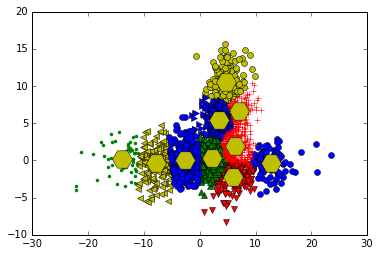

In [30]:
styles = ['bo','r+','g.','yo','b>','rv','g^', 'y<']*len(centroids)

for i in range(len(centroids)):
    c = clusterF[clusterF.cluster == i]
    plt.plot(c.x, c.y, styles[i])
    plt.plot(centroids[i][0],centroids[i][1],'y', marker='H', markersize=20)
plt.show()

## What do you think will happen if we change the means to be closer together, or increase the standard deviations?